# 2. How to select appropriate No, of nodes in a layer 

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras_tuner as kt

# Load the diabetes dataset from UCI repository
df = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")

# Display the first few rows to verify the data
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Assuming the last column is the target variable and all others are features
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column as the target

print("Shape of X:", X.shape)  # Should be (768, 8) if using the diabetes dataset
print("Shape of y:", y.shape)  # Should be (768,)


Shape of X: (768, 8)
Shape of y: (768,)


In [4]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X= scale.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)  # Should be (614, 8)
print("Shape of X_test:", X_test.shape)    # Should be (154, 8)


Shape of X_train: (537, 8)
Shape of X_test: (231, 8)


In [6]:
def build_model1(hp):
    model1 = Sequential()
    
    # Define the number of units for the Dense layer using hyperparameter tuning
    units = hp.Int('units', min_value=8, max_value=128, step=8)
    
    # Add the first Dense layer with appropriate input dimension
    model1.add(Dense(units=units, activation='relu', input_shape=(8,)))  # Use (8,) instead of input_dim=8
    
    # Add the output layer with a single neuron and 'sigmoid' activation for binary classification
    model1.add(Dense(1, activation='sigmoid'))
    
    # Compile the model with the 'rmsprop' optimizer and binary cross-entropy loss function
    model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model1


In [7]:
tuner1 = kt.RandomSearch(
    build_model1,
    objective='val_accuracy',
    max_trials=5
)

tuner1.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))




Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7662337422370911

Best val_accuracy So Far: 0.7662337422370911
Total elapsed time: 00h 00m 11s


In [8]:
tuner1.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
units: 72
Score: 0.7662337422370911

Trial 0 summary
Hyperparameters:
units: 96
Score: 0.761904776096344

Trial 1 summary
Hyperparameters:
units: 120
Score: 0.7532467246055603

Trial 2 summary
Hyperparameters:
units: 64
Score: 0.7489177584648132

Trial 3 summary
Hyperparameters:
units: 24
Score: 0.649350643157959


In [9]:
# Get the best model
model1 = tuner1.get_best_models(num_models=1)[0]

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
history = model1.fit(X_train, y_train, batch_size=32, epochs=100, initial_epoch=6,validation_data=(X_test, y_test))

Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8102 - loss: 0.4388 - val_accuracy: 0.7576 - val_loss: 0.5033
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7970 - loss: 0.4257 - val_accuracy: 0.7446 - val_loss: 0.5032
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7934 - loss: 0.4395 - val_accuracy: 0.7489 - val_loss: 0.5034
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7723 - loss: 0.4392 - val_accuracy: 0.7489 - val_loss: 0.5043
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7639 - loss: 0.4478 - val_accuracy: 0.7489 - val_loss: 0.5056
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7693 - loss: 0.4465 - val_accuracy: 0.7446 - val_loss: 0.5063
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7903 - loss: 0.4301 - val_accuracy: 0.7446 - val_loss: 0.5080
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7798 - loss: 0.4434 - val_accuracy: 0.74

### Accuracy of Model

In [12]:
loss,accuracy = model1.evaluate(X_test,y_test)
print("Accuracy of model:- ",accuracy*100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7301 - loss: 0.5528 
Accuracy of model:-  73.16017150878906


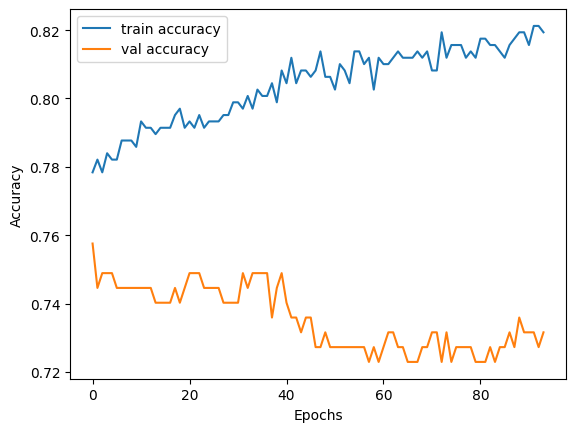

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
